# Metodi numerici per l'informatica - Esercitazione 1

Benvenuti al corso di *Metodi Numerici dell'Informatica*. L'obiettivo delle esercitazioni è quello di impadronirsi dei concetti spiegati nelle lezioni teoriche da un punto di vista pratico. In particolare, useremo il linguaggio *Python 3.8* e la libreria per il calcolo numerico *NumPy*. Le Esercitazioni sono strutturate come Jupyter notebooks in Colab dove vengono presentati richiami alla teoria, esempi eseguibili ed esercizi guidati. Ricordiamo di eseguire i notebooks in ordine sequenziale. Eseguire il notebook in ordine diverso da quello sequenziale puo' portare a risultati non aspettati dato che usiamo variabili aventi lo stesso nome in celle diverse. **Let's have fun!**

Gli argomenti dell'Esercitazione 1 sono i seguenti:

1. *Vettori*
2. *Matrici*
3. *Applicazioni lineari*

Prima di iniziare, come primo step, dobbiamo importare le dipendenze necessarie per eseguire il notebook. Tale operazione sarà eseguita all'inizio di tutti i notebooks futuri. Le due librerie che useremo principalmente sono NumPy, per eseguire calcoli numerici e *Matplotlib* per visualizzare i risultati. Inoltre importiamo il modulo locale `utils.py` per caricare alcune funzionionalità aggiuntive.

In [177]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Vettori

### 1.a Creazione di vettori

Il datatype fondamentale che NumPy adopera è il `numpy.ndarray`, chiamato anche semplicemente *array* Numpy. Con questa struttura dati possiamo rappresentare un'ampia classe di oggetti algebrici quali vettori, matrici e tensori multidimensionali. Iniziamo con l'oggetto numerico elementare, ossia il vettore.

Un vettore (reale) $n$-dimensionale $\mathbf{x}$  è una sequenza (finita e ordinata) di $n$ numeri reali $x_i \in \mathbb{R}$:
$$\mathbf{x} = (x_1, \dots, x_n)  \in \mathbb{R}^n$$

In Python potremmo rappresentare un vettore semplicemente con il datatype `list`:

In [178]:
x = [0., 3.5, 4.]

print(f"{x = }")
print(f"{type(x) = }")

x = [0.0, 3.5, 4.0]
type(x) = <class 'list'>


Il problema di questa rappresentazione e' l'assenza di un numero cospicuo di operazioni che possono essere effettuate con i vettori numerici. Per esempio se proviamo a creare un un'altro vettore $\mathbf{y}$ come lista di numeri e applichiamo l'operatore `+` di Python, otteniamo la concatenazione delle liste invece del vettore $(-1, 3.5, 6)$:

In [179]:
y = [-2., 0., 2.]
print(f"{x + y = }")

x + y = [0.0, 3.5, 4.0, -2.0, 0.0, 2.0]


Per creare un vettore numerico quindi usiamo Numpy (il modulo Numpy e' importato come `np`, prasse comune nell'utilizzo della libreria), passando la lista alla funzione `array`:

In [180]:
x = np.array([0., 3.5, 4.])  # 0. e 4. sono di tipo float64, dato che viene aggiunto un punto alla fine

print(f"{x = }")
print(f"{type(x) = }")

x = array([0. , 3.5, 4. ])
type(x) = <class 'numpy.ndarray'>


Per conoscere a posteriori il numero di elementi contenuti nel vettore possiamo usare l'attributo `shape`, il quale e' un dato `tuple`. In seguito (quando parleremo di matrici) vedremo più in dettaglio il significato di questo attributo. Per adesso, la dimensione del vettore e' data dall'unico elemento contenuto nella tupla, ossia `shape[0]`:

In [234]:
print(f"{x.shape = }")
print(f"{x.shape[0] = }")

x.shape = (14,)
x.shape[0] = 14


Tipicamente adoperiamo vettori reali però può risultare opportuno usare vettori le cui componenti sono numeri interi, per creare un vettore di interi, la lista passata ad `array` deve contenere solo componenti `int64` (o varianti come `long`). Il vettore $\mathbf{x}$ definito sopra contiene entrate reali (tipo `float64`). Per conoscere il datatype delle componenti di un array Numpy, si puo' accedere all'attributo `dtype` dell'oggetto.

In [182]:
x_int = np.array([1, 2, 3])

print(f"{x_int = }")
print(f"{x_int.dtype = }")
print(f"{x.dtype = }")

x_int = array([1, 2, 3])
x_int.dtype = dtype('int64')
x.dtype = dtype('float64')


Se alcune entrate del vettore sono reali ed altre intere, Numpy converte automaticamente le entrate intere in entrate reali e otteniamo un vettore reale:

In [183]:
x = np.array([0, 3, 4.]) # notare che 4. è float64
print(f"{x = }")

x = array([0., 3., 4.])


Esistono altri metodi per creare vettori. Tre casi importanti sono i seguenti:

1. il vettore nullo $\mathbf{0}$, `np.zeros`
2. il vettore $\mathbf{1}$ contenente 1 su ogni entrata, `np.ones`
3. vettori randomm, le cui componenti sono (pseudo-)casuali essendo campionate da una distribuzione di probabilità; per campionare dalla distribuzione uniforme in $[0, 1)$ si usa `np.random.rand`

Per crearli bisogna specificare solamente la dimensione del vettore:

In [184]:
d = 3

x_0 = np.zeros(d)
x_1 = np.ones(d)
x_rand = np.random.rand(d)

print(f"{x_0 = }")
print(f"{x_1 = }")
print(f"{x_rand = }")

x_0 = array([0., 0., 0.])
x_1 = array([1., 1., 1.])
x_rand = array([0.36995546, 0.39806687, 0.43700325])


Per indicizzare la componente $i$-esima di un vettore si usa la sintassi delle parentesi quadrate (come con le liste Python). Lo stesso vale per lo slicing di sottovettori:

In [212]:
x = np.array([3., 2., 1., 0., -1., -2.])
print(f"{x = }")

for i in range(3):
    print(f"x[{i}] = {x[i]}")

print(f"{x[2:] = }")
print(f"{x[:4] = }")
print(f"{x[2:4] = }")

x = array([ 3.,  2.,  1.,  0., -1., -2.])
x[0] = 3.0
x[1] = 2.0
x[2] = 1.0
x[2:] = array([ 1.,  0., -1., -2.])
x[:4] = array([3., 2., 1., 0.])
x[2:4] = array([1., 0.])


##### Esercizi

1. Crea il vettore $\mathbf{x} = (1, \dots, 100) \in \mathbb{R}^{100}$
2. Crea un vettore di dimensione 10 campionato dalla distribuzione *gaussiana unitaria* (detta anche *normale* o *standard*). (hint: usare la documentazione di Numpy)

In [187]:
# spazio lasciato per gli esercizi

### 1.b Visualizzare vettori

L'utilita' dei vettori sta nel poter modellare diversi tipi di dato utili nelle applicazioni. Classicamente i vettori furono introdotti per rapresentare quantità geometriche tipiche della fisica (si pensi al concetto di forza in meccanica classica o in elettrodinamica), ma essi possono esprimere entità molto diverse tra di loro spaziando dalle onde sonore al calore presente su un corpo. Per rendere più chiara questa idea visualizziamo alcuni esempi interessanti.

Iniziamo con la visualizzazione classica di un vettore come un segmento orientato nel piano / spazio. Nel caso di uno spazio vettoriale tutti i vettori sono centrati nell'origine. Per visualizzare una freccia in 2D si può usare la funzione `arrow` di Matplotlib

In [268]:
def vis_1vector_2d(x, xlim=1.2, ylim=1.2, head_width=0.04, head_length=0.1):
    # crea la figura (una figure puo contenere diversi assi cartesiani come subplot) con la dimensione in inch specificata in `figsize`
    fig = plt.figure(figsize=(8, 6))
    # aggiungiamo un'asse cartesiano alla figura
    ax = fig.add_subplot()
    # imposta il titolo
    ax.set_title("Un vettore 2D")
    # disegna la freccia;
    # i primi due argomenti sono il punto (C_x, C_y) dove viene posizionata la coda della vettore
    # il terzo e il quarto argomento sono l'offset (δx, δy) relativo a (C_x, C_y), quindi la testa del vettore si troverà sul punto (C_x+δx, C_y+δy)
    # gli argomenti `fc` ed `ec` specificano il colore interno e del bordo del vettore, rispettivamente ('k' sta per black)
    # `head_width` e `head_length` indicano le dimensioni della punta (di default sono impostati a 0 quindi sembra disegnare un segmento invece di un vettore
    ax.arrow(0, 0, x[0], x[1],
              fc='k', ec='k', head_width=head_width, head_length=head_length)
    # imposta l'intervallo delle x e y visualizzabili
    ax.set_xlim([-xlim, xlim])
    ax.set_ylim([-ylim, ylim])
    # abilita la visualizzazione di una griglia in sottofondo
    ax.grid()

In [189]:
x_2d = np.random.rand(2)

print(f"{x_2d = }")

x_2d = array([0.76770795, 0.05181471])


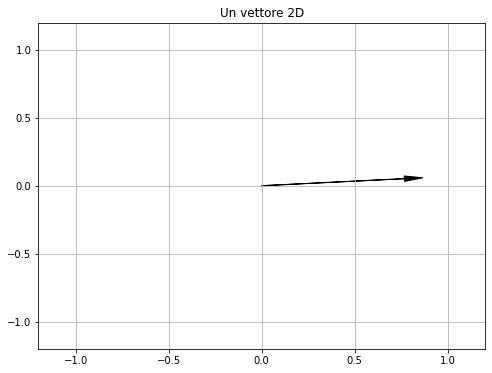

In [190]:
vis_1vector_2d(x_2d)

Per abilitare il rendering dei grafici 3D, è richiesto eseguire il seguente import (`mpl_toolkits` è un'estensione di Numpy):

In [191]:
from mpl_toolkits import mplot3d

Di default in Matplotlib non si può visualizzare una freccia 3D come nel caso 2D. A tal fine abbiamo definito la classe `Arrow3D` nel file `utils.py`, che qui importiamo:

In [261]:
from utils import Arrow3D

def vis_1vector_3d(x, xlim=1.2, ylim=1.2, zlim=1.2):
    # crea la figura
    fig = plt.figure(figsize=(10, 8))
    # aggiunge un'asse; notare l'argomento aggiuntivo projection='3d', necessario per creare un asse 3D
    ax = fig.add_subplot(projection='3d')
    # imposta il titolo
    ax.set_title("Un vettore 3D")
    # definisce un dizionario di parametri usati per definire lo stile di Arrow3D;
    # mutation_scale definisce la dimensione della punta, arrowstyle lo stile della punta,
    # color il colore della freccia come nel caso 2D
    arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='k')
    # crea la freccia (le tre liste definiscono i valori [C_x, δx], [C_y, δy], [C_z, δz] come nell'esempio 2D)
    a = Arrow3D([0, x[0]], [0, x[1]], [0, x[2]], **arrow_prop_dict)
    # aggiunge la freccia all'asse
    ax.add_artist(a)
    # imposta i limiti del plot come nell'esempio 2D
    ax.set_xlim([-xlim, xlim])
    ax.set_ylim([-ylim, ylim])
    ax.set_zlim([-zlim, zlim])

In [262]:
x_3d = np.random.rand(3)

print(f"{x_3d = }")

x_3d = array([0.98497751, 0.16745565, 0.5989359 ])


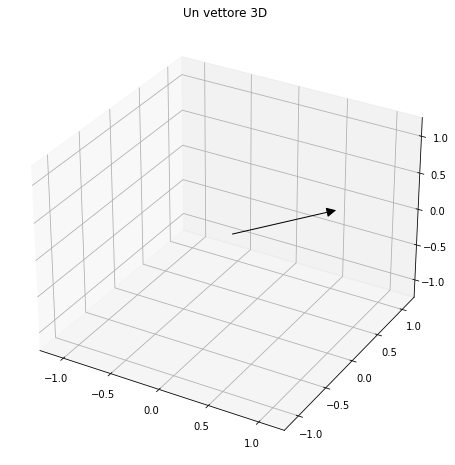

In [263]:
vis_1vector_3d(x_3d)

Quando il numero di componenti di un vettore $\mathbf{x} = (x_0, \dots, x_n)$ è maggiore di 3 possiamo trattare il vettore come una sequenza, ossia come un'applicazione $$s: [n] \to \mathbb{R},$$ dove $[n] = \{1, \dots, n\}$ è l'insieme dei numeri naturali da $1$ a $n$, ponendo $s(i) = x_i, \forall i \in [n]$. Come esempio possiamo visualizzare l'andamento del valore di Bitcoin nell'ultima settimana. Carichiamo il file `bitcoin.txt` dal disco:

In [246]:
# apertura del file
f_bitcoin = open('bitcoin.txt')
# comprensione di liste per scorrere le righe del file (ogni riga e' un valore numerico) e convertire da `str` a `float`
data_bitcoin = [float(line) for line in f_bitcoin]
# abbiamo effetuato lo slicing degli ultimi 14 valori nella lista, corrispondenti alle ultime 2 settimane
bitcoin = np.array(data_bitcoin)[-14:]

print(f"{bitcoin = }")

bitcoin = array([33723.0289781 , 34662.43589358, 31637.78005541, 32186.27767093,
       34649.64458753, 34434.33531428, 35867.77773549, 35040.83724889,
       33572.11765253, 33897.04858963, 34668.54840182, 35287.77976616,
       33746.00245614, 34235.19345116])


Per visualizzare una sequenza possiamo usare la funzione `plot` di Matplotlib. Il primo argomento e' un vettore contenente $[n]$ mentre il secondo contiene i valori di `bitcoin`.

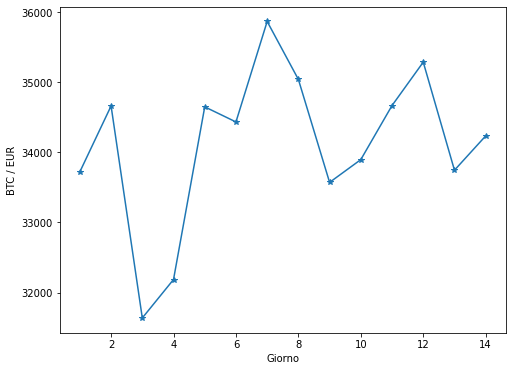

In [258]:
x = np.arange(1, 14 + 1) # np.arange(1, 14+1) e' equivalente a np.array(range(1,14+1)); ricordiamo che l'estremo destro del range e' escluso
y = bitcoin

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
# imposta la label dell'asse x
ax.set_xlabel('Giorno')
# imposta la label dell'asse y
ax.set_ylabel('BTC / EUR')
ax.plot(x, y, '*-')
plt.show()

Vediamo cosa succede quando osserviamo l'andamento dal giorno il `2013-04-29`. Per effettuare il plot bisogna conoscere il numero di elementi nel vettore, quindi lo scopriamo usando `shape`:

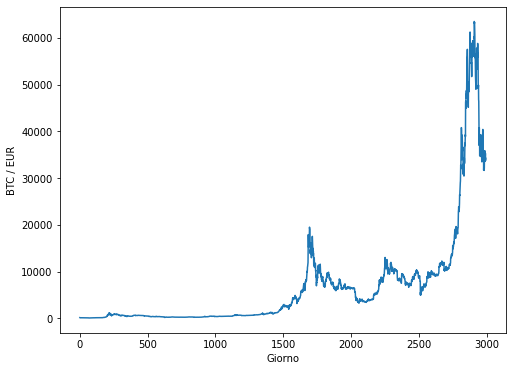

In [265]:
bitcoin_total = np.array(data_bitcoin)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
# imposta la label dell'asse x
ax.set_xlabel('Giorno')
# imposta la label dell'asse y
ax.set_ylabel('BTC / EUR')
ax.plot(np.arange(1, bitcoin_total.shape[0] + 1), bitcoin_total)
plt.show()

Avendo aggiunto un numero cospicuo di punti osserviamo che la sequenza "zoomata" ha l'aspetto di una funzione continua. Come visto nella lezioni teorica, le funzioni continue formano uno spazio vettoriale, quindi le funzioni sono a tutti gli effetti dei vettori.

### 1.b Operazioni su vettori

##### Esercizi

1. Inverti il verso di rotazione dell'orologio.
2. Consideriamo $\mathbb{R}^n[x]$, lo spazio vettoriale dei polinomi di grado al più $n$. Qualsiasi polinomio $$p(x) = a_n x^n + \dots + a_1 x + a_0$$ può essere rappresentato dal vettore dei coefficienti $$\mathbf{x} = (a_n, \dots, a_0)$$ (contentente $n+1$ elementi). Disegna il polinomio rappresentato da $\mathbf{x} = (2., 1., 2.)$. (Hint: definisci il vettore delle $x$, poi applica operazioni su questo vettore per ottenere il vettore delle $y$)

In [ ]:
# spazio lasciato per gli esercizi